In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random as rd

**Names: Milena de swart, Vidhya Narayanasamy** 
<**Letters chosen : v, d, a**>

In [ ]:
v = [48,87]  # letter v
d = [59,73]  # letter d
a = [19,41]  # letter a

**Function to find the distance**

In [ ]:
# Function to calculate the distance
# define a function
def dist(x,u):
  # calculate the distance using the given formula
  dist = math.log(3 +(x[0]-u[0])**2+(x[1]-u[1])**2)
  return dist

**Function to find the difference**

In [ ]:
#Function to calculate the difference
# define a function
def diff(x):
  # calculate the distance from each given point (u, v, w) to X
  # the difference is all these points added together
  diff_x = dist(x,v) + dist(x,d) + dist (x,a)
  return diff_x

**Computing Diff(x) for 20 random points**

In [ ]:
# Generating random points of x
randx = []   # empty list to store the random values
for i in range(0,20):
    # generate 2 random numbers between 0 and 100
    random1 = rd.randint(0,100)
    random2 = rd.randint(0,100)
    # combine these numbers into coordinates of a point
    randompoints = [random1, random2]
    randx.append(randompoints)

differences = [] # empty list to store the difference scores
# apply the diff() function to every point and save in the list
for point in randx:
  difference = diff(point)
  differences.append(difference)

# calculate the mean, max and min for these answers and print
avg = np.mean(differences)
max = np.max(differences)
min = np.min(differences)
print("The average difference of our 20 random points is", avg, ", the maximum is", max, " and the minimum is", min)

The average difference of our 20 random points is 22.39168872977389 , the maximum is 26.708759988660674  and the minimum is 17.9314942300503


***About Random search***

> Because of generating random points, the diff() values are sligthly different each time. Most of the time, the outcome values of diff() are between around 15 and 25, with an average of around 22 or 23. Since our difference function calculates the slope of the formula, to find a minimum or maximum, we'd like our diff() values to be as small as possible. Because of this, it seems random search is not such a useful method to find a minimum or maximum, because the diff() values we find are usually not so small.



**Compute Diff(x)=Diff(50,50)**

In [ ]:
# define xzero
xzero = [50,50]
# calculate the difference value by calling the diff() function and print
diff_x = diff(xzero)

print(diff_x)

20.597073118828412


**Function to compute and print the gradient of Diff by using a small delta=0.001**

In [ ]:
def grad(x):
    # we will use a delta value of 0.001
    delta = 0.001
    # the gradient is calculated by taking the deltax/delta for the two values
    x1 = [x[0]+delta, x[1]]
    x2 = [x[0], x[1]+delta]
    gradient = [(diff(x1)-diff(x))/delta, (diff(x2)-diff(x))/delta]
    return gradient

**Gradient at (0,0), (100,0), (0,100) and (100,100)**

In [ ]:
print(grad([0,0]))
print(grad([0,100]))
print(grad([100,0]))
print(grad([100,100]))

[-0.04169135875997654, -0.07428309709922587]
[-0.0766640145251074, 0.05400777737207818]
[0.041461560734035174, -0.04769660838022105]
[0.08627085645684929, 0.04316675468274411]


Based on the answers above, there be a minimum around (100, 0), because these values are closest to 0.

**Function to compute xnext**

In [ ]:
def nextstep(xzero, stepsize):
  # calculate the gradient at the input point
  gradient_x = grad(xzero)
  # the next values of x are x[0] in the direction of the gradient[0]
  # and x[1] in the direction of the gradient[1]
  x1_next = (xzero[0] - gradient_x[0])*stepsize
  x2_next = (xzero[1] - gradient_x[1])*stepsize
  xnext = [x1_next, x2_next]
  return xnext

# then calculate the next step based on the given input
xzero = [50, 50]
stepsize = 1.0
print(nextstep(xzero, stepsize))

[49.9671255446998, 50.11159606746247]


**Function to reach the local minimum**

In [ ]:
# define a stepping function
def stepper(xzero, stepsize):
  xvalues = []
  difference_values = [] # create empty lists
  stoppoint = [0.0,0.0]
  while grad(xzero) != stoppoint:
    # calculate the difference and the next step
    difference = diff(xzero)
    xzero_old = xzero
    xzero = nextstep(xzero, stepsize)
    # adjust stepsize if necessary
    if xzero_old == xzero:
      stepsize = 2*stepsize

    # optional: print the values found
    # print(grad(xzero))
    # print("X:", xzero, "Diff:", difference)

    # save the found values
    xvalues.append(xzero)
    difference_values.append(difference)
  # calculate the minimum diff value and its index
  minimum_diff = np.min(difference_values)
  index_minimum = np.argmin(difference_values)
  # use this index to find the values for x for the minimum diff
  minimum_x = xvalues[index_minimum]
  return minimum_x, minimum_diff

xzero = [50,50]
stepsize = 1.0

# use a large stepnumber (n = 200) to ensure we find the correct minimum
minimum_1, minimum_1_diff = stepper(xzero, stepsize)
print("The first minimum we found is", minimum_1, "with difference value", minimum_1_diff)

The first minimum we found is [58.84864247857031, 73.0966369129959] with difference value 14.730038748718567


In [ ]:
#repeat for value of x = [0,0]
xzero = [0,0]
minimum_2, minimum_2_diff = stepper(xzero, stepsize)
print("The second minimum we found is", minimum_2, "with difference value", minimum_2_diff)

The second minimum we found is [19.075042623764915, 41.08318394198207] with difference value 16.960953330271785


In [ ]:
# repeat for value of x = [100,100]
xzero = [100,100]
minimum_3, minimum_3_diff = stepper(xzero, stepsize)
print("The third minimum we found is", minimum_3, "with difference value", minimum_3_diff)

The third minimum we found is [58.84860032168362, 73.09671503721162] with difference value 14.730038733022868


***Finding minima***

> For these three starting points, we found two different minimum points with different difference values. This means that we found various local minima and that there is thus more than one local minimum in this function.

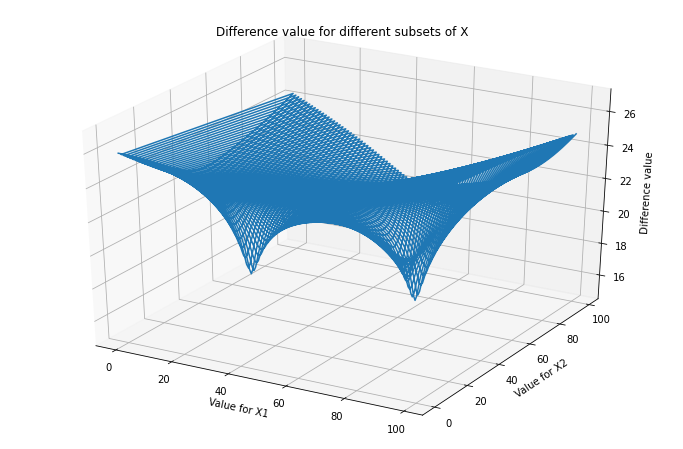

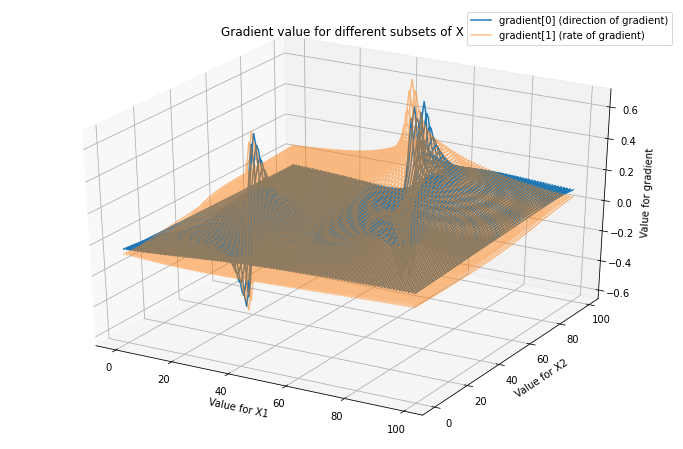

In [67]:
# import plotting packages
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

# create empty lists
plotdiffs = []
gradients0 = []
gradients1 = []
x_s = []
y_s = []

for i in range(0,100):
  for j in range(0,100):
    # generate points and add them to a list
    point = [i, j]
    x_s.append(i)
    y_s.append(j)
    # calculate the differences and gradient values for the points
    diffpoint = diff(point)
    plotdiffs.append(diffpoint)
    gradpoint = grad(point)
    gradients0.append(gradpoint[0])
    gradients1.append(gradpoint[1])

# plot the differerence function
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot3D(x_s, y_s, plotdiffs)

# add plot and axes titles
plt.title("Difference value for different subsets of X")
ax.set_xlabel('Value for X1')
ax.set_ylabel('Value for X2')
ax.set_zlabel('Difference value')
plt.show()

# plot gradient in two areas
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot3D(x_s, y_s, gradients0, label = 'gradient[0] (direction of gradient)')
ax.plot3D(x_s, y_s, gradients1, label = 'gradient[1] (rate of gradient)', alpha=0.5) # make this layer half-visible so you can see the layer below


# add axes labels
ax.set_xlabel('Value for X1')
ax.set_ylabel('Value for X2')
ax.set_zlabel('Value for gradient')

# add legend and title
plt.title("Gradient value for different subsets of X")
plt.legend(loc="upper right")

# show plot
plt.show()